In [39]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

In [40]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CIVPART,RIMP,DOMINV,output
0,66.401561,1897.877300,1914.319864,15350.689141
1,66.567906,1909.449873,1935.388276,15296.949549
2,66.368272,1937.700440,1945.436039,15414.081647
3,66.435287,1984.780600,1953.233062,15548.317389
4,66.357563,2026.600707,1972.183579,15668.042341
5,66.292225,2062.779517,1914.721368,15963.673505
6,66.425188,2066.500733,1936.138662,15882.196455
7,66.266511,2087.185150,1959.028009,15928.186146
8,66.289332,2094.980823,1965.673323,15934.247954
9,66.281878,2126.085790,1983.950547,16002.007186


In [41]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

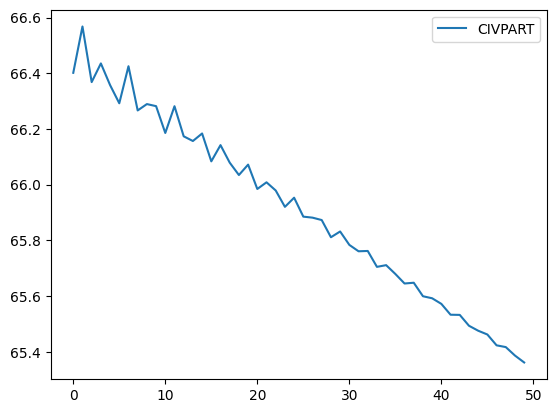

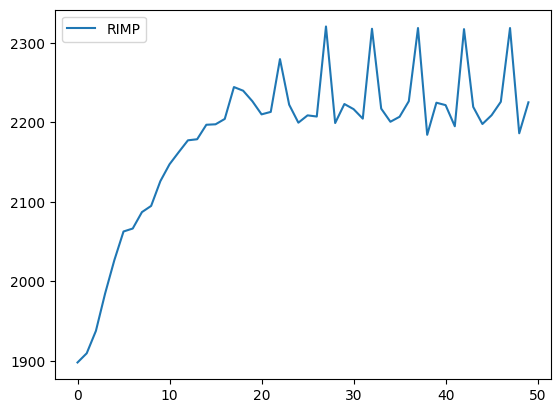

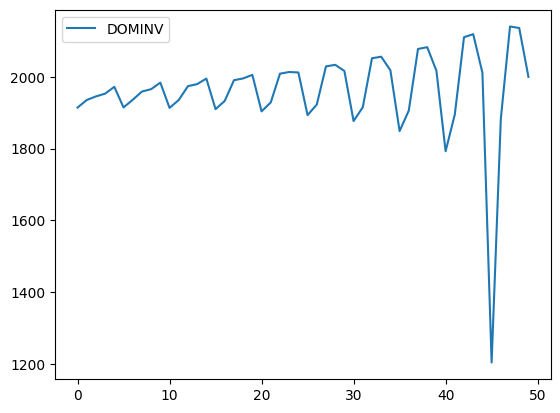

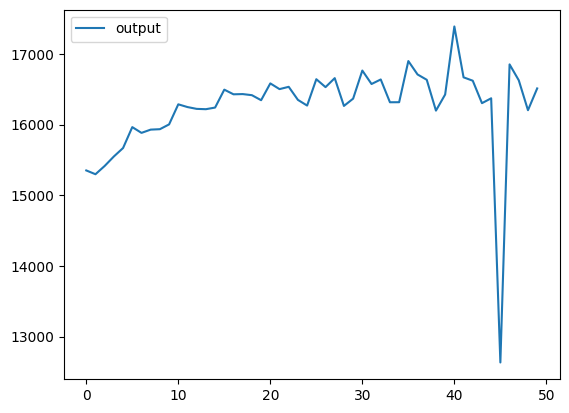

<Figure size 640x480 with 0 Axes>

In [42]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

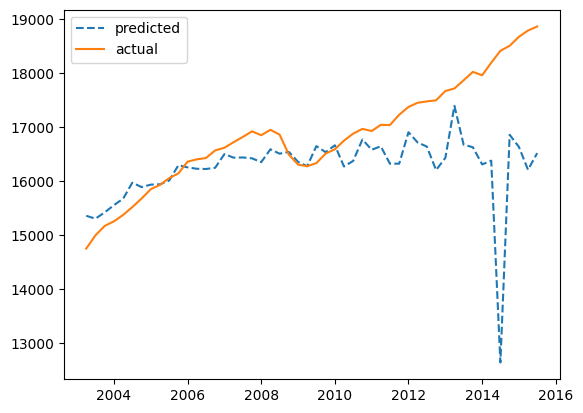

In [43]:
pred = df['output']
act = act.iloc[5:55]

pred.index = act.index

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [44]:
r2_score(act, pred)

-0.46595624110029976

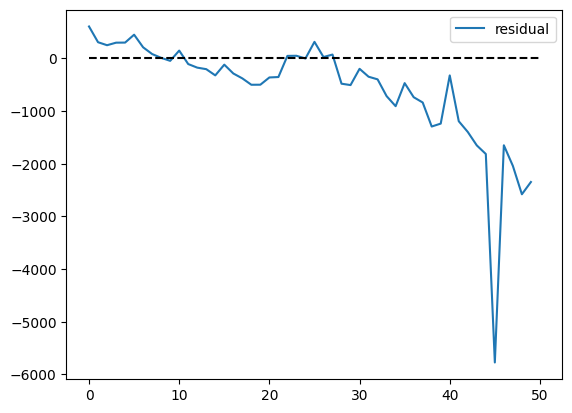

In [47]:
resid = (pred - act['RGDP']).reset_index(drop=True)
resid.plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()
plt.show()